In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ds_path = r"F:\Jup\Celebal Assignments\Untitled Folder\plant-pathology-2020-fgvc7\images"

In [4]:
test_img_path = ds_path + "\Test_3.jpg" 

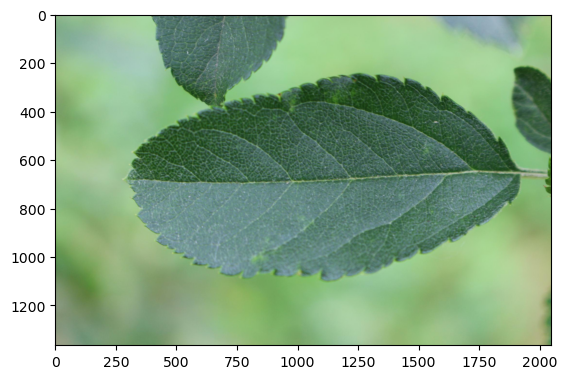

In [6]:
main = cv2.imread(test_img_path)
img=cv2.cvtColor(main,cv2.COLOR_BGR2RGB)
plt.imshow(img)

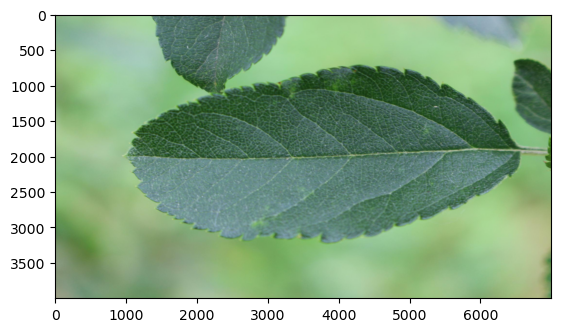

In [11]:
resized_image = cv2.resize(img, (7000, 4000))
plt.imshow(resized_image,cmap="Greys_r")

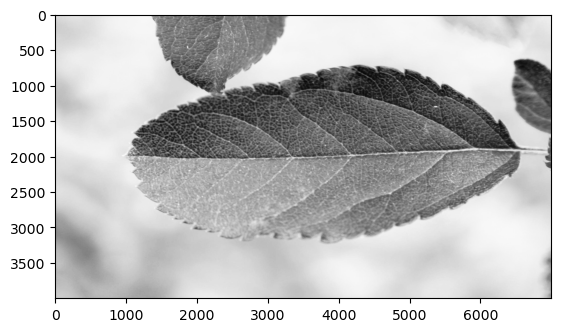

In [12]:
gray = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="Greys_r")

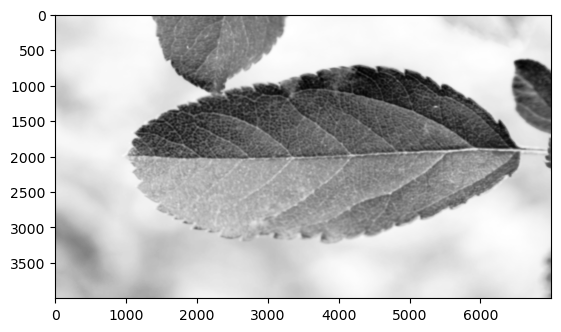

In [63]:
blurred = cv2.GaussianBlur(gray, (55,55),0)
plt.imshow(blurred,cmap="Greys_r")

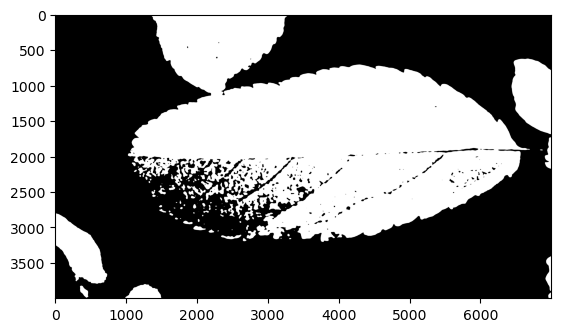

In [64]:
ret_otsu,im_bw_otsu = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

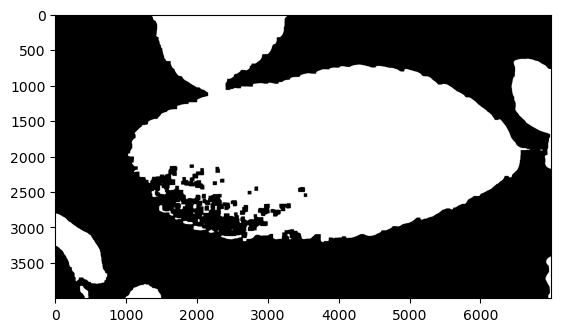

In [65]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="Greys_r")

In [66]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [67]:
len(contours)

43

In [68]:
#Finding the correct leaf contour from the list of contours
def find_contour(cnts):
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    print(contains)
    return val[0]

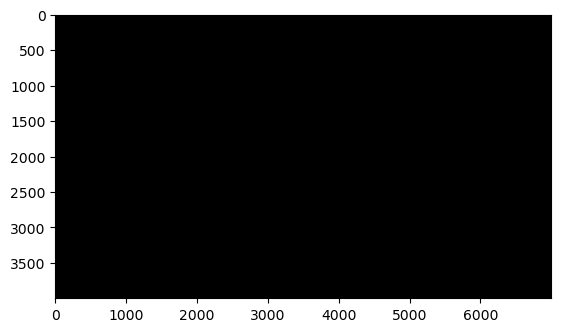

In [69]:
#Creating mask image for background subtraction using leaf contour
black_img = np.empty([4000,7000,3],dtype=np.uint8)
black_img.fill(0)
plt.imshow(black_img,cmap="Greys_r")

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


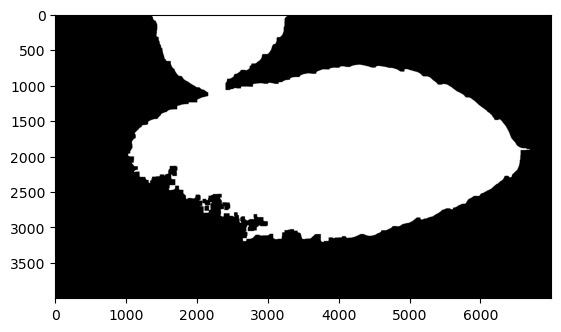

In [70]:
index = find_contour(contours)
cnt = contours[index]
mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
plt.imshow(mask)

In [71]:
mask=cv2.bitwise_and(resized_image,mask)

In [72]:
final_img = np.copy(mask)
black_pixels = np.all(final_img == black_pix, axis=-1)
final_img[black_pixels] = white_pix


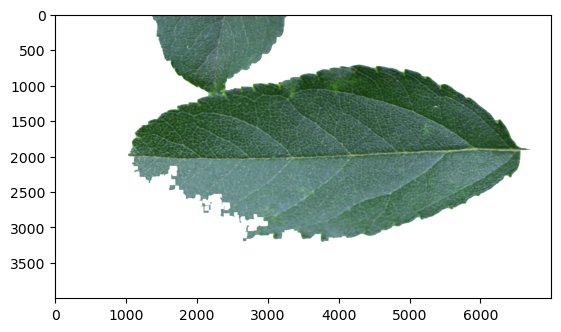

In [73]:
plt.imshow(final_img)